In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
# Simulate a time series with linear trend + noise
dates = pd.date_range(start='2010-01-01', periods=120, freq='ME')
data = 100 + 0.5 * np.arange(120) + np.random.normal(0, 5, 120)
df = pd.DataFrame({'date': dates, 'value': data})
df.set_index('date', inplace=True)
df.head()

,value
date,
2010-01-31,97.894505
2010-02-28,102.686544
2010-03-31,95.157457
2010-04-30,102.844196
2010-05-31,101.038961


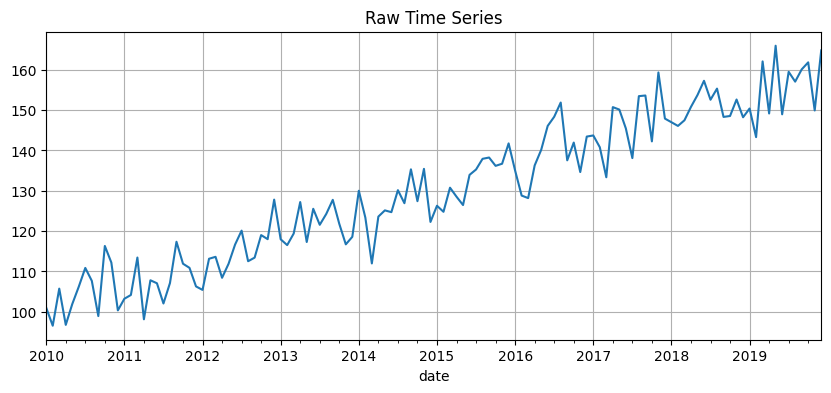

In [3]:
df['value'].plot(figsize=(10, 4), title='Raw Time Series')
plt.grid(True)
plt.show()

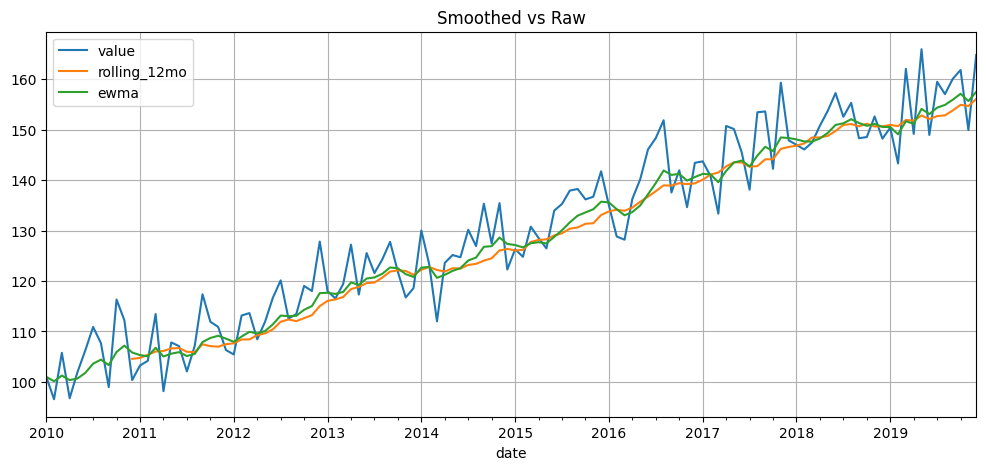

In [4]:
df['rolling_12mo'] = df['value'].rolling(window=12).mean()
df['ewma'] = df['value'].ewm(alpha=0.2, adjust=False).mean()

ax = df[['value', 'rolling_12mo', 'ewma']].plot(figsize=(12, 5), title='Smoothed vs Raw')
plt.grid(True)
plt.show()

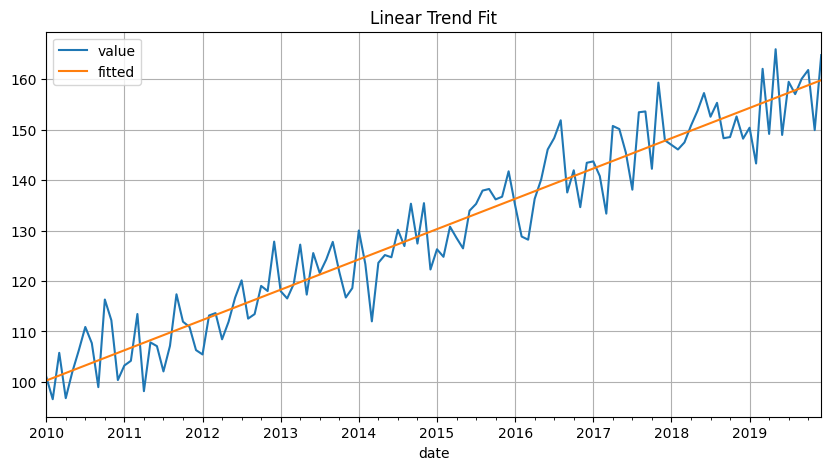

In [5]:
df['t'] = np.arange(len(df))
X = sm.add_constant(df['t'])
model = sm.OLS(df['value'], X).fit()
df['fitted'] = model.fittedvalues

ax = df[['value', 'fitted']].plot(figsize=(10, 5), title='Linear Trend Fit')
plt.grid(True)
plt.show()

In [6]:
print(f"R²: {model.rsquared:.3f}")
print(f"Adjusted R²: {model.rsquared_adj:.3f}")
print(f"AIC: {model.aic:.2f}")
print(f"BIC: {model.bic:.2f}")

R²: 0.915
Adjusted R²: 0.915
AIC: 743.55
BIC: 749.13


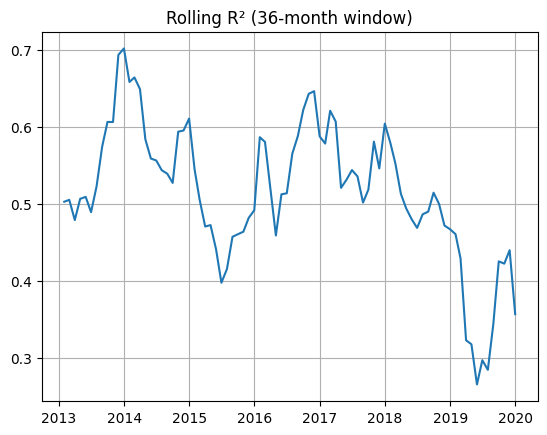

In [7]:
window = 36
rolling_r2 = [
    sm.OLS(df['value'].iloc[i:i+window], sm.add_constant(df['t'].iloc[i:i+window])).fit().rsquared
    for i in range(len(df) - window)
]

plt.plot(df.index[window:], rolling_r2)
plt.title('Rolling R² (36-month window)')
plt.grid(True)
plt.show()